In [5]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visuals
import seaborn as sns
import sys
import Metrica_EPV as mepv
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects

In [6]:
if __name__ == "__main__":
    driver = webdriver.Chrome('chromedriver.exe')
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1541867/Live/Europe-Champions-League-2020-2021-Chelsea-Real-Madrid"
match_data = main.getMatchData(driver, url, close_window=False)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# Add xG data to events dataframe
events_df = main.getxGFromUnderstat(match_data, events_df, driver)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Europe, League: Champions League, Season: 2020/2021, Match Id: 1541867
Expected Goals data for league not available


In [7]:
EPV = mepv.load_EPV_grid('EPV_grid.csv')
events_df = main.to_metric_coordinates_from_whoscored(events_df)
events_df = main.addEpvToDataFrame(events_df,EPV)

## Get Acurate pass data from a team

In [8]:
# Chelsea team Id = 15

In [9]:
# Team data
team = 'Chelsea'
teamId = 15
opponent = 'Madrid'
venue = 'home'

# Get Player Names
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[[row['displayName'] == 'Pass' for row in list(events_df['type'])]].reset_index(drop=True)
passes_df = passes_df.loc[[row['displayName'] == 'Successful' for row in list(passes_df['outcomeType'])]].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(passes_df['playerId'])])

passes_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,isShot,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.295217e+09,4,0,8.0,15,29.6,13.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-21.624,-12.614,-24.888,-23.596,0.0083,0.0101,0.0018
1,2.295217e+09,7,0,32.0,15,59.3,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,9.858,16.854,-34.000,-29.988,0.0142,0.0171,0.0029
2,2.295217e+09,11,1,21.0,15,40.7,100.0,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-9.858,-17.172,34.000,27.404,0.0096,0.0089,-0.0007
3,2.295217e+09,12,1,22.0,15,33.8,90.3,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-17.172,-31.376,27.404,29.376,0.0089,0.0067,-0.0022
4,2.295217e+09,13,1,24.0,15,20.4,93.2,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-31.376,-45.792,29.376,5.168,0.0067,0.0072,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2.295243e+09,710,92,31.0,15,67.3,90.8,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,18.338,28.938,27.744,32.300,0.0186,0.0259,0.0073
295,2.295243e+09,713,92,52.0,15,71.1,78.1,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,22.366,33.178,19.108,17.136,0.0238,0.0341,0.0103
296,2.295243e+09,716,92,56.0,15,80.8,66.1,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,32.648,26.500,10.948,-5.780,0.0410,0.0352,-0.0058
297,2.295243e+09,722,94,22.0,15,27.8,63.9,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-23.532,20.034,9.452,13.736,0.0095,0.0227,0.0132


In [10]:
passes_df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'matchId', 'startDate', 'startTime',
       'score', 'ftScore', 'htScore', 'etScore', 'venueName', 'maxMinute',
       'playerId', 'endX', 'endY', 'relatedEventId', 'playerName',
       'relatedPlayerId', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY',
       'isShot', 'cardType', 'isGoal', 'x_metrica', 'endX_metrica',
       'y_metrica', 'endY_metrica', 'EPV_start', 'EPV_end', 'EPV_difference'],
      dtype='object')

In [11]:
passes_df['outcomeType']

0      {'value': 1, 'displayName': 'Successful'}
1      {'value': 1, 'displayName': 'Successful'}
2      {'value': 1, 'displayName': 'Successful'}
3      {'value': 1, 'displayName': 'Successful'}
4      {'value': 1, 'displayName': 'Successful'}
                         ...                    
294    {'value': 1, 'displayName': 'Successful'}
295    {'value': 1, 'displayName': 'Successful'}
296    {'value': 1, 'displayName': 'Successful'}
297    {'value': 1, 'displayName': 'Successful'}
298    {'value': 1, 'displayName': 'Successful'}
Name: outcomeType, Length: 299, dtype: object

In [12]:
passes_df['playerName'].unique()

array(['Andreas Christensen', 'César Azpilicueta', 'Ben Chilwell',
       'Jorginho', 'Antonio Rüdiger', 'Édouard Mendy', "N'Golo Kanté",
       'Thiago Silva', 'Mason Mount', 'Kai Havertz', 'Timo Werner',
       'Christian Pulisic', 'Reece James', 'Hakim Ziyech',
       'Olivier Giroud'], dtype=object)

In [13]:
jorgi = passes_df[passes_df['playerName']=='Jorginho']

In [14]:
jorgi

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,isShot,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
3,2.295217e+09,12,1,22.0,15,33.8,90.3,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-17.172,-31.376,27.404,29.376,0.0089,0.0067,-0.0022
17,2.295218e+09,30,3,16.0,15,35.3,79.4,3,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-15.582,-14.416,19.992,31.008,0.0100,0.0090,-0.0010
26,2.295220e+09,60,10,18.0,15,14.1,54.3,10,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-38.054,-16.536,2.924,-30.056,0.0084,0.0087,0.0003
32,2.295221e+09,106,10,59.0,15,50.7,39.8,10,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,0.742,4.240,-6.936,-5.780,0.0150,0.0156,0.0006
36,2.295220e+09,76,11,26.0,15,64.1,29.1,11,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,14.946,17.808,-14.212,10.132,0.0201,0.0214,0.0013
37,2.295220e+09,80,11,38.0,15,59.4,63.3,11,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,9.964,13.356,9.044,20.808,0.0178,0.0184,0.0006
44,2.295221e+09,108,14,49.0,15,62.0,29.8,14,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,12.720,20.246,-13.736,-6.800,0.0180,0.0230,0.0050
48,2.295221e+09,115,15,11.0,15,64.1,78.1,15,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,14.946,17.066,19.108,-14.960,0.0195,0.0211,0.0016
52,2.295221e+09,119,15,22.0,15,65.6,29.7,15,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,16.536,8.798,-13.804,-22.644,0.0201,0.0157,-0.0044
59,2.295222e+09,133,17,17.0,15,41.7,17.6,17,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-8.798,7.102,-22.032,-23.868,0.0111,0.0146,0.0035


In [15]:
jorgi = jorgi[['playerName','minute','x','endX','y','endY']]
jorgi

,playerName,minute,x,endX,y,endY
3,Jorginho,1,33.8,20.4,90.3,93.2
17,Jorginho,3,35.3,36.4,79.4,95.6
26,Jorginho,10,14.1,34.4,54.3,5.8
32,Jorginho,10,50.7,54.0,39.8,41.5
36,Jorginho,11,64.1,66.8,29.1,64.9
37,Jorginho,11,59.4,62.6,63.3,80.6
44,Jorginho,14,62.0,69.1,29.8,40.0
48,Jorginho,15,64.1,66.1,78.1,28.0
52,Jorginho,15,65.6,58.3,29.7,16.7
59,Jorginho,17,41.7,56.7,17.6,14.9


In [16]:
jorgi['x'] = jorgi['x']*1.2
jorgi['y'] = jorgi['y']*.8
jorgi['endX'] = jorgi['endX']*1.2
jorgi['endY'] = jorgi['endY']*.8

<ipython-input-16-92c29e600b83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jorgi['x'] = jorgi['x']*1.2
<ipython-input-16-92c29e600b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jorgi['y'] = jorgi['y']*.8
<ipython-input-16-92c29e600b83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [17]:
jorgi = jorgi.reset_index()
jorgi

,index,playerName,minute,x,endX,y,endY
0,3,Jorginho,1,40.56,24.48,72.24,74.56
1,17,Jorginho,3,42.36,43.68,63.52,76.48
2,26,Jorginho,10,16.92,41.28,43.44,4.64
3,32,Jorginho,10,60.84,64.80,31.84,33.20
4,36,Jorginho,11,76.92,80.16,23.28,51.92
5,37,Jorginho,11,71.28,75.12,50.64,64.48
6,44,Jorginho,14,74.40,82.92,23.84,32.00
7,48,Jorginho,15,76.92,79.32,62.48,22.40
8,52,Jorginho,15,78.72,69.96,23.76,13.36
9,59,Jorginho,17,50.04,68.04,14.08,11.92


In [18]:
jorgi_first_half = jorgi[jorgi['minute']<=45]
jorgi_second_half = jorgi[jorgi['minute']>45]

Text(0.5, 1.0, 'Jorginho Pass Map vs Real Madrid')

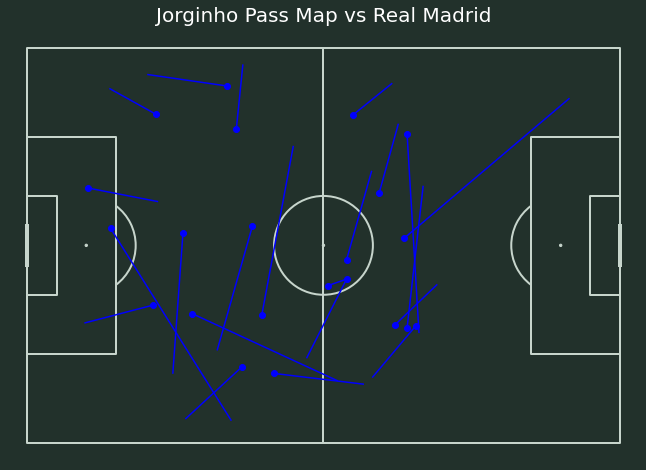

In [19]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(jorgi_first_half['x'])):
        plt.plot((jorgi_first_half['x'][x],jorgi_first_half['endX'][x]),(jorgi_first_half['y'][x],jorgi_first_half['endY'][x]),color='blue')
        plt.scatter(jorgi_first_half['x'][x],jorgi_first_half['y'][x],color='blue')

plt.title('Jorginho Pass Map vs Real Madrid',color='white',size=20)

Text(0.5, 1.0, 'Jorginho Pass Map vs Real Madrid')

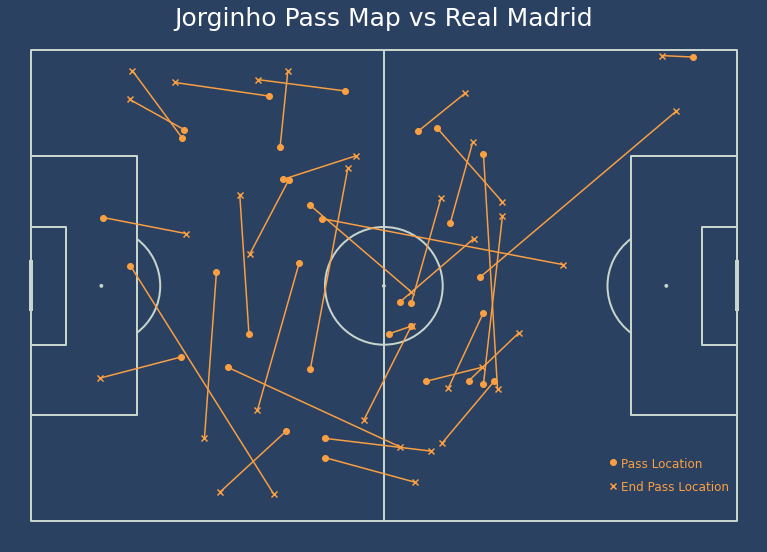

In [20]:
fig ,ax = plt.subplots(figsize=(13.5,10))
background = '#2B4162'
color_line = '#FA9F42'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(jorgi['x'])):
        plt.plot((jorgi['x'][x],jorgi['endX'][x]),(jorgi['y'][x],jorgi['endY'][x]),color=color_line)
        plt.scatter(jorgi['endX'][x],jorgi['endY'][x],color=color_line,marker='x')
        plt.scatter(jorgi['x'][x],jorgi['y'][x],color=color_line)

plt.scatter(99,10,color=color_line)
plt.scatter(99,6,color=color_line,marker='x')
plt.text(100.3,9.12,'Pass Location',size=12,color = color_line)
plt.text(100.3,5.12,'End Pass Location',size=12,color = color_line)


plt.title('Jorginho Pass Map vs Real Madrid',color='white',size=25,pad=1)

In [21]:
passes_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,isShot,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.295217e+09,4,0,8.0,15,29.6,13.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-21.624,-12.614,-24.888,-23.596,0.0083,0.0101,0.0018
1,2.295217e+09,7,0,32.0,15,59.3,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,9.858,16.854,-34.000,-29.988,0.0142,0.0171,0.0029
2,2.295217e+09,11,1,21.0,15,40.7,100.0,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-9.858,-17.172,34.000,27.404,0.0096,0.0089,-0.0007
3,2.295217e+09,12,1,22.0,15,33.8,90.3,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-17.172,-31.376,27.404,29.376,0.0089,0.0067,-0.0022
4,2.295217e+09,13,1,24.0,15,20.4,93.2,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-31.376,-45.792,29.376,5.168,0.0067,0.0072,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2.295243e+09,710,92,31.0,15,67.3,90.8,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,18.338,28.938,27.744,32.300,0.0186,0.0259,0.0073
295,2.295243e+09,713,92,52.0,15,71.1,78.1,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,22.366,33.178,19.108,17.136,0.0238,0.0341,0.0103
296,2.295243e+09,716,92,56.0,15,80.8,66.1,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,32.648,26.500,10.948,-5.780,0.0410,0.0352,-0.0058
297,2.295243e+09,722,94,22.0,15,27.8,63.9,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-23.532,20.034,9.452,13.736,0.0095,0.0227,0.0132


In [22]:
passes_df['x'] = passes_df['x']*1.2
passes_df['y'] = passes_df['y']*.8
passes_df['endX'] = passes_df['endX']*1.2
passes_df['endY'] = passes_df['endY']*.8

In [23]:
passes_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,isShot,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.295217e+09,4,0,8.0,15,35.52,10.72,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-21.624,-12.614,-24.888,-23.596,0.0083,0.0101,0.0018
1,2.295217e+09,7,0,32.0,15,71.16,0.00,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,9.858,16.854,-34.000,-29.988,0.0142,0.0171,0.0029
2,2.295217e+09,11,1,21.0,15,48.84,80.00,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-9.858,-17.172,34.000,27.404,0.0096,0.0089,-0.0007
3,2.295217e+09,12,1,22.0,15,40.56,72.24,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-17.172,-31.376,27.404,29.376,0.0089,0.0067,-0.0022
4,2.295217e+09,13,1,24.0,15,24.48,74.56,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-31.376,-45.792,29.376,5.168,0.0067,0.0072,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2.295243e+09,710,92,31.0,15,80.76,72.64,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,18.338,28.938,27.744,32.300,0.0186,0.0259,0.0073
295,2.295243e+09,713,92,52.0,15,85.32,62.48,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,22.366,33.178,19.108,17.136,0.0238,0.0341,0.0103
296,2.295243e+09,716,92,56.0,15,96.96,52.88,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,32.648,26.500,10.948,-5.780,0.0410,0.0352,-0.0058
297,2.295243e+09,722,94,22.0,15,33.36,51.12,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-23.532,20.034,9.452,13.736,0.0095,0.0227,0.0132


Text(0.5, 1.0, 'Chelsea Pass Map vs Real Madrid')

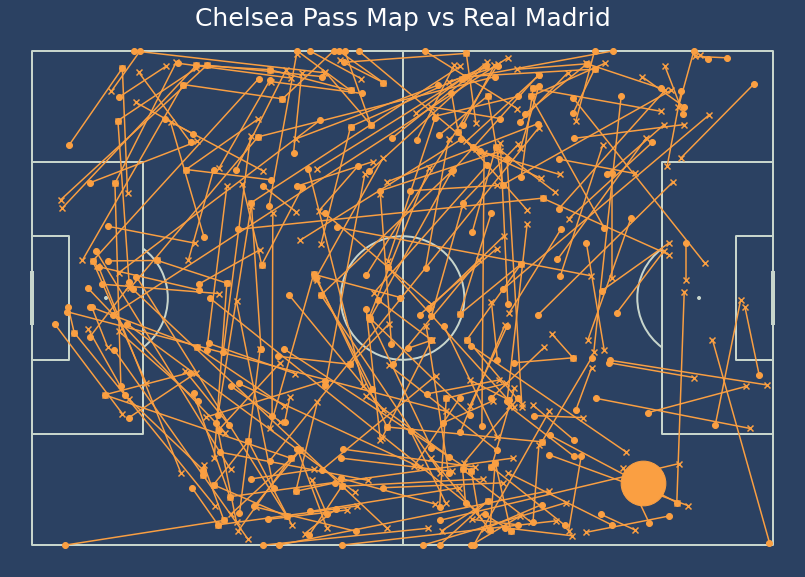

In [24]:
fig ,ax = plt.subplots(figsize=(20.5,10))
background = '#2B4162'
color_line = '#FA9F42'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(passes_df['x'])):
        plt.plot((passes_df['x'][x],passes_df['endX'][x]),(passes_df['y'][x],passes_df['endY'][x]),color=color_line)
        plt.scatter(passes_df['endX'][x],passes_df['endY'][x],color=color_line,marker='x')
        plt.scatter(passes_df['x'][x],passes_df['y'][x],color=color_line)

plt.scatter(99,10,color=color_line,s=2000)
#plt.scatter(99,6,color=color_line,marker='x')
#plt.text(100.3,9.12,'Pass Location',size=12,color = color_line)
#plt.text(100.3,5.12,'End Pass Location',size=12,color = color_line)


plt.title('Chelsea Pass Map vs Real Madrid',color='white',size=25,pad=1)

## For Rainbow Text

In [25]:
def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

## Every Player

In [26]:
passes_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,isShot,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.295217e+09,4,0,8.0,15,35.52,10.72,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-21.624,-12.614,-24.888,-23.596,0.0083,0.0101,0.0018
1,2.295217e+09,7,0,32.0,15,71.16,0.00,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,9.858,16.854,-34.000,-29.988,0.0142,0.0171,0.0029
2,2.295217e+09,11,1,21.0,15,48.84,80.00,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-9.858,-17.172,34.000,27.404,0.0096,0.0089,-0.0007
3,2.295217e+09,12,1,22.0,15,40.56,72.24,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-17.172,-31.376,27.404,29.376,0.0089,0.0067,-0.0022
4,2.295217e+09,13,1,24.0,15,24.48,74.56,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-31.376,-45.792,29.376,5.168,0.0067,0.0072,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2.295243e+09,710,92,31.0,15,80.76,72.64,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,18.338,28.938,27.744,32.300,0.0186,0.0259,0.0073
295,2.295243e+09,713,92,52.0,15,85.32,62.48,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,22.366,33.178,19.108,17.136,0.0238,0.0341,0.0103
296,2.295243e+09,716,92,56.0,15,96.96,52.88,93,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,32.648,26.500,10.948,-5.780,0.0410,0.0352,-0.0058
297,2.295243e+09,722,94,22.0,15,33.36,51.12,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-23.532,20.034,9.452,13.736,0.0095,0.0227,0.0132


In [27]:
playername = passes_df['playerName'].unique()
playername

array(['Andreas Christensen', 'César Azpilicueta', 'Ben Chilwell',
       'Jorginho', 'Antonio Rüdiger', 'Édouard Mendy', "N'Golo Kanté",
       'Thiago Silva', 'Mason Mount', 'Kai Havertz', 'Timo Werner',
       'Christian Pulisic', 'Reece James', 'Hakim Ziyech',
       'Olivier Giroud'], dtype=object)

In [28]:
fig.axes

[<AxesSubplot:title={'center':'Chelsea Pass Map vs Real Madrid'}>]

In [29]:
player =['Andreas Christensen', 'César Azpilicueta', 'Ben Chilwell']

In [30]:
player

['Andreas Christensen', 'César Azpilicueta', 'Ben Chilwell']

In [31]:
for m in playername:
    print(m)

Andreas Christensen
César Azpilicueta
Ben Chilwell
Jorginho
Antonio Rüdiger
Édouard Mendy
N'Golo Kanté
Thiago Silva
Mason Mount
Kai Havertz
Timo Werner
Christian Pulisic
Reece James
Hakim Ziyech
Olivier Giroud


In [32]:
for m in player:
            pass_viz = passes_df[passes_df['playerName']==m]
            print(pass_viz['playerName'].unique())

['Andreas Christensen']
['César Azpilicueta']
['Ben Chilwell']


In [33]:
pass_viz

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,isShot,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
2,2.295217e+09,11,1,21.0,15,48.84,80.00,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-9.858,-17.172,34.000,27.404,0.0096,0.0089,-0.0007
10,2.295218e+09,19,1,43.0,15,38.52,75.28,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-18.974,-26.182,29.988,17.952,0.0084,0.0082,-0.0002
15,2.295218e+09,26,2,6.0,15,70.08,75.84,2,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,8.904,1.908,30.464,25.432,0.0143,0.0129,-0.0014
18,2.295218e+09,33,3,28.0,15,42.96,80.00,3,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-15.052,-7.420,34.000,28.560,0.0086,0.0106,0.0020
20,2.295218e+09,35,3,32.0,15,38.52,76.96,3,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-18.974,-29.468,31.416,32.028,0.0084,0.0068,-0.0016
38,2.295220e+09,81,11,39.0,15,75.12,64.48,11,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,13.356,21.836,20.808,14.552,0.0184,0.0243,0.0059
40,2.295220e+09,83,11,45.0,15,105.60,70.96,11,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,40.280,34.238,26.316,30.464,0.0351,0.0314,-0.0037
41,2.295220e+09,87,12,11.0,15,107.16,80.00,12,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,41.658,39.432,34.000,26.248,0.0356,0.0351,-0.0005
46,2.295221e+09,110,14,57.0,15,93.12,60.00,14,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,29.256,37.418,17.000,23.868,0.0316,0.0339,0.0023
47,2.295221e+09,114,15,8.0,15,82.08,74.32,15,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,19.504,16.854,29.172,20.604,0.0202,0.0192,-0.0010


In [34]:
for i, ax in enumerate(fig.axes):
    print(i)

0


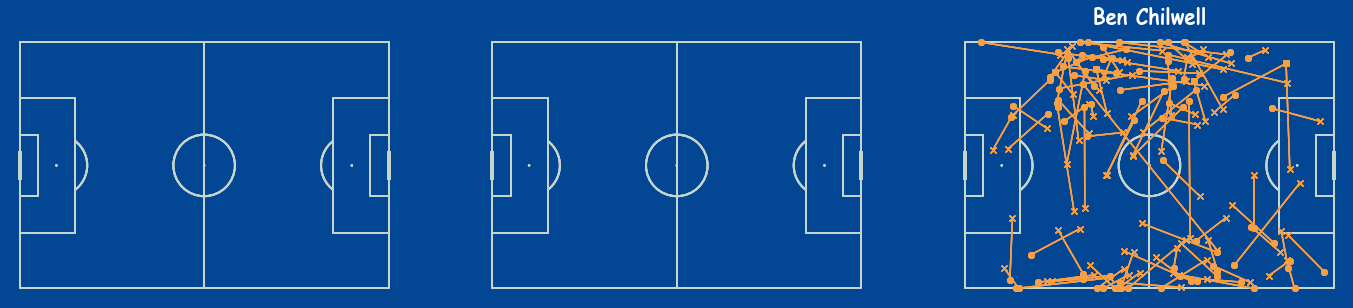

In [35]:
fig ,ax = plt.subplots(1,3,figsize=(24,15))
background = '#034694'
color_line = '#FA9F42'
fig.set_facecolor(background)

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


for i,ax in enumerate(fig.axes):
        ax.set_facecolor('#3b3b38')
        for m in player:
            pitch.draw(ax=ax)
            pass_viz = passes_df[passes_df['playerName']==m].reset_index()
            plt.title(m, loc='center', fontsize=20, fontweight='bold', color='#FFFFFF',fontfamily='Comic Sans MS')
            for x in range(len(pass_viz['x'])):
            #use a for loop to plot each pass           
                plt.plot((pass_viz['x'][x],pass_viz['endX'][x]),(pass_viz['y'][x],pass_viz['endY'][x]),color=color_line)
                plt.scatter(pass_viz['endX'][x],pass_viz['endY'][x],color=color_line,marker='x')
                plt.scatter(pass_viz['x'][x],pass_viz['y'][x],color=color_line)
                
#plt.suptitle("Sebaran Persentase Penerimaan Pajak Tahun di Jawa Barat", fontsize=30, fontweight='bold', color='black', y=0.96,fontfamily='Gill Sans MT')
#plt.show()

Text(0.5, 0.7, 'Chelsea Passes vs Real Madrid')

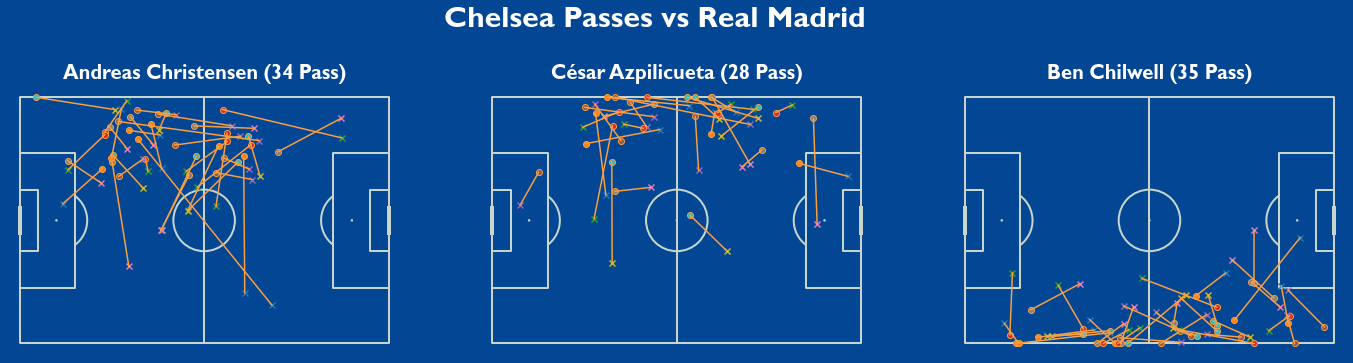

In [36]:
fig ,ax = plt.subplots(1,3,figsize=(24,15))
background = '#034694'
color_line = '#FA9F42'
fig.set_facecolor(background)

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor(background)
        pitch.draw(ax=ax)
        pass_viz = passes_df[passes_df.playerName==player[i]].reset_index()
        total_pass = len(pass_viz)
        for x in range(len(pass_viz['x'])):
            ax.plot((pass_viz['x'][x],pass_viz['endX'][x]),(pass_viz['y'][x],pass_viz['endY'][x]),color=color_line)
            ax.scatter(pass_viz['endX'][x],pass_viz['endY'][x],edgecolors='red',marker='x')
            ax.scatter(pass_viz['x'][x],pass_viz['y'][x],edgecolors=color_line)
            #ax.title()
            ax.set_title("%s (%s Pass)"%(player[i],total_pass), loc='center', fontsize=20, fontweight='bold', color='#FFFFFF',fontfamily='Gill Sans MT')
    
    except:
        pass


plt.suptitle("Chelsea Passes vs Real Madrid", fontsize=30, fontweight='bold', color='White', y=0.7,fontfamily='Gill Sans MT')
#plt.show()

In [37]:
all_players = passes_df['playerName'].unique()
all_players

array(['Andreas Christensen', 'César Azpilicueta', 'Ben Chilwell',
       'Jorginho', 'Antonio Rüdiger', 'Édouard Mendy', "N'Golo Kanté",
       'Thiago Silva', 'Mason Mount', 'Kai Havertz', 'Timo Werner',
       'Christian Pulisic', 'Reece James', 'Hakim Ziyech',
       'Olivier Giroud'], dtype=object)

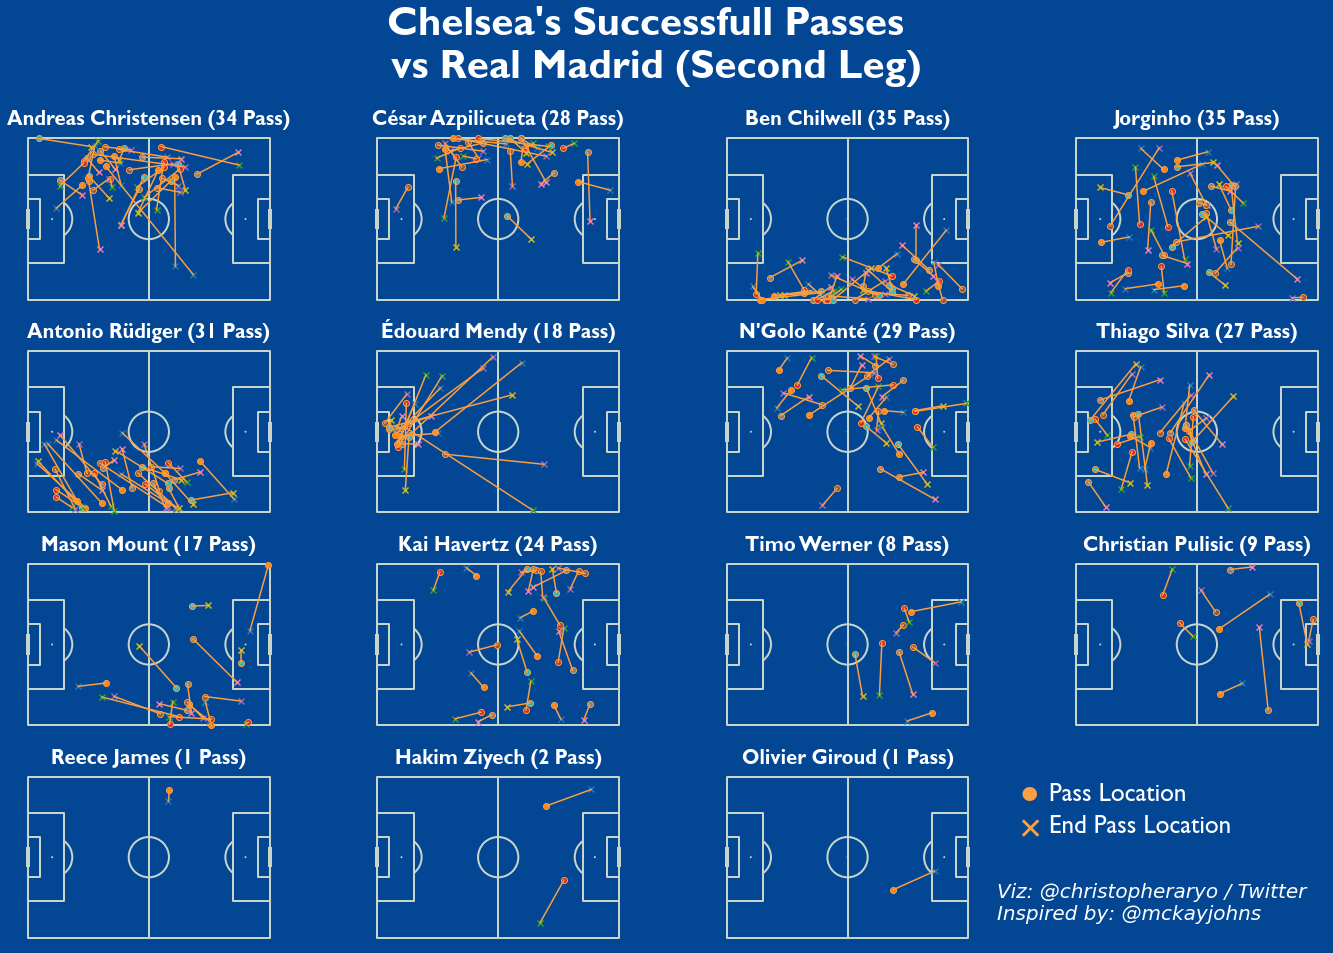

In [38]:
fig ,ax = plt.subplots(4,4,figsize=(24,15))
background = '#034694'
color_line = '#FA9F42'
fig.set_facecolor(background)
ax.flat[-1].set_visible(False)

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor(background)
        pitch.draw(ax=ax)
        pass_viz = passes_df[passes_df.playerName==all_players[i]].reset_index()
        total_pass = len(pass_viz)
        for x in range(len(pass_viz['x'])):
            ax.plot((pass_viz['x'][x],pass_viz['endX'][x]),(pass_viz['y'][x],pass_viz['endY'][x]),color=color_line)
            ax.scatter(pass_viz['endX'][x],pass_viz['endY'][x],edgecolors='red',marker='x')
            ax.scatter(pass_viz['x'][x],pass_viz['y'][x],edgecolors=color_line)
            ax.set_title("%s (%s Pass)"%(all_players[i],total_pass), loc='center', fontsize=20, fontweight='bold', color='#FFFFFF',fontfamily='Gill Sans MT')
    
    except:
        pass

fig.text(0.71,0.25,'•',size=50,color=color_line)
fig.text(0.712,0.225,'✕',size=30,color=color_line)
fig.text(0.73,0.26,'Pass Location',size=25,color = 'white',fontfamily='Gill Sans MT')
fig.text(0.73,0.23,'End Pass Location',size=25,color = 'white',fontfamily='Gill Sans MT')

plt.suptitle("Chelsea's Successfull Passes \n vs Real Madrid (Second Leg)", fontsize=40, fontweight='bold', color='White', y=0.995,fontfamily='Gill Sans MT')
fig.text(0.7,0.15,'Viz: @christopheraryo / Twitter \nInspired by: @mckayjohns',fontstyle='italic',size=20,color='#FFFFFF')
plt.savefig('Chelsea.png')